In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

df = pd.read_csv('INPUT.csv')
df = df.drop(columns=['Note'])
df

,Gender,Race,Residence,Income,School Type,Hooks,Major,SAT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Acceptances,Waitlists,Rejections
0,M,ASIAN,MI,Low,-1,NONE,CS,1440,2.0,4.5,['*PURDUE'],"['*GEORGIA TECH', '*UMICH']","['*UIUC', '*NORTHEASTERN']"
1,OTHER,ASIAN,IN,High,-1,NONE,CS,1390,5.5,4.5,['*STANFORD'],[],['*CALTECH']
2,F,ASIAN,MA,High,PUBLIC,NONE,NEUROSCIENCE,1580,7.5,7.5,"['*UCLA', '*HARVARD', '*YALE', '*COLUMBIA', '*...",['*UPENN'],"['*STANFORD', '*COLUMBIA']"
3,M,WHITE,IN,Low,-1,URM,CS,1580,5.5,1.5,"['*GEORGIA TECH', '*UT-AUSTIN', '*ARIZONA STAT...","['*HARVARD', '*UCHICAGO']","['*UCLA', '*NORTHWESTERN', '*UMICH', '*EMORY',..."
4,F,ASIAN,OR,Middle,PUBLIC,NONE,CS,1580,7.5,4.7,"['*CORNELL', '*RUTGERS']",[],['*CORNELL']
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,M,ASIAN,GA,Middle,PUBLIC,LGBT,BIO,1580,5.0,3.5,"['*NYU', '*UMICH', '*USC']","['*JOHNS HOPKINS', '*UCHICAGO']","['*HARVARD', '*YALE', '*BROWN', '*STANFORD', '..."
1480,F,ASIAN,CA,High,PUBLIC,NONE,CS,1590,7.5,3.5,"['*DUKE', '*UCSD', '*UIUC', '*NORTHEASTERN']","['*CMU', '*UCSB', '*UCI']","['*UCLA', '*HARVARD', '*BROWN', '*STANFORD', '..."
1481,M,ASIAN,CA,Middle,PUBLIC,NONE,ENG,1240,3.0,6.5,['*UCI'],['*POMONA'],"['*UCLA', '*BERKELEY']"
1482,M,ASIAN,CA,Low,PUBLIC,NONE,CS,1580,6.5,7.5,"['*UCLA', '*PURDUE', '*POMONA', '*ARIZONA STAT...","['*UCLA', '*STANFORD', '*CORNELL', '*GEORGIA T...","['*HARVARD', '*YALE', '*COLUMBIA', '*MIT', '*C..."


In [103]:
colleges = [ '*UCLA', '*HARVARD', '*YALE'
, '*STANFORD', '*NORTHWESTERN', '*COLUMBIA', '*CORNELL', '*BERKELEY'
, '*DUKE', '*PRINCETON', '*UCSD', '*MIT', '*CALTECH', '*GEORGIA TECH'
, '*JOHNS HOPKINS', '*SWARTHMORE', '*DARTMOUTH', '*CMU', '*PURDUE'
, '*RICE', '*POMONA', '*WILLIAMS', '*VANDERBILT', '*NYU', '*UPENN'
, '*UMICH', '*EMORY', '*CASE WESTERN', '*USC', '*UCSB', '*UCD', '*UCSC'
, '*UCR', '*UIUC', '*BOSTON UNIVERSITY', '*BOSTON COLLEGE', '*WASHU'
, '*UT-AUSTIN', '*UT-DALLAS', '*FORDHAM', '*RUTGERS', '*San Jose State University'
, '*VIRGINIA TECH', '*NORTHEASTERN', '*COLGATE', '*UW MADISON'
, '*TUFTS', '*TULANE', '*HARVEY MUDD', '*UCHICAGO', '*UNC CHAPEL HILL'
, '*UVA', '*CLAREMONT MCKENNA', '*ARIZONA STATE', '*TAMU', '*UCI', '*UCM']
# *BROWN
# *STANFORD
# *NORTHWESTERN
# *COLUMBIA
# *CORNELL
# *BERKELEY
# *DUKE
# *PRINCETON
# *UCSD
# *MIT
# *CALTECH
# *GEORGIA TECH
# *JOHNS HOPKINS
# *SWARTHMORE
# *DARTMOUTH
# *CMU
# *PURDUE
# *RICE
# *POMONA
# *WILLIAMS
# *VANDERBILT
# *NYU
# *UPENN
# *UMICH
# *EMORY
# *CASE WESTERN
# *USC
# *UCSB
# *UCD
# *UCSC
# *UCR
# *UIUC
# *BOSTON UNIVERSITY
# *BOSTON COLLEGE
# *WASHU
# *UT-AUSTIN
# *UT-DALLAS
# *FORDHAM
# *RUTGERS
# *San Jose State University
# *VIRGINIA TECH
# *NORTHEASTERN
# *COLGATE
# *UW MADISON
# *TUFTS
# *TULANE
# *HARVEY MUDD
# *UCHICAGO
# *UNC CHAPEL HILL
# *UVA
# *CLAREMONT MCKENNA
# *ARIZONA STATE
# *TAMU
# *UCI
# *UCM



In [104]:
def basicAnalysis(df, college):
    
    ret = []
    ret.append(college)
    ret.append(len(df))

    accepted = df[df['Decision'] == 0]
    waitlist = df[df['Decision'] == 1]
    rejected = df[df['Decision'] == 2]

    return [college, len(df), len(accepted), len(waitlist), len(rejected), 
            accepted['SAT'].mean(), waitlisted['SAT'].mean(), rejected['SAT'].mean(), 
            accepted['EC-AWARDS'].mean(), waitlist['EC-AWARDS'].mean(), rejected['EC-AWARDS'].mean(), 
            accepted['ESSAY-LOR-INTERVIEW'].mean(), waitlist['ESSAY-LOR-INTERVIEW'].mean(), rejected['ESSAY-LOR-INTERVIEW'].mean(), 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0, 0]
    #return ['School', 'Applications', 'Acceptances', 'Waitlists', 'Rejections', 'AcceptedSATAvg', 'WaitlistedSATAvg', 'RejectedSATAvg', 'AcceptedECAvg', 'WaitlistedECAvg', 'RejectedECAvg', 'AcceptedEssayAvg', 'WaitlistedEssayAvg', 'RejectedEssayAvg']


In [105]:
def getNumericalCorrelations(df, college, overall_df):
    # Correlation matrix for NUMBER rows
    corr_matrix = df[['SAT', 'EC-AWARDS', 'ESSAY-LOR-INTERVIEW', 'Decision']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

    # increase size of plt
    plt.rcParams['figure.figsize'] = [10, 10]

    plt.title(str(college) + " Correlation Matrix")
    plt.savefig(f"res/{college}/"+str(college) + " Correlation Matrix.png")
    plt.close()

    
    #add the correlation matrix to the overalldf
    mask = overall_df['School'] == college
    if mask.sum() == 1:
        overall_df.loc[mask, 'COR-SAT-EC'] = corr_matrix['SAT']['EC-AWARDS']
        overall_df.loc[mask, 'COR-SAT-ESSAY'] = corr_matrix['SAT']['ESSAY-LOR-INTERVIEW']
        overall_df.loc[mask, 'COR-SAT-Decision'] = corr_matrix['SAT']['Decision']
        overall_df.loc[mask, 'COR-EC-Decision'] = corr_matrix['EC-AWARDS']['Decision']
        overall_df.loc[mask, 'COR-EC-ESSAY'] = corr_matrix['EC-AWARDS']['ESSAY-LOR-INTERVIEW']
        overall_df.loc[mask, 'COR-ESSAY-Decision'] = corr_matrix['ESSAY-LOR-INTERVIEW']['Decision']

        # print(overall_df[mask])


    return overall_df

In [106]:

def catagoricalCorrelations(df, college, overall_df):

    # Chi-square test fAGAINST the Decision
    for col in ['Gender', 'Race', 'Residence', 'Income', 'School Type', 'Hooks', 'Major']:
        contingency_table = pd.crosstab(df[col], df['Decision'])

        chi2, p, _, _ = chi2_contingency(contingency_table)
        #print(f'{col} - p-value: {p}')


        mask = overall_df['School'] == college
        if mask.sum() == 1:
            overall_df.loc[mask, f'pval-{col}'] = {p}


    return overall_df


In [107]:
def optimalFeatures(df, college, overall_df):
    mask = overall_df['School'] == college

########################################################################    #make the model


    label_encoders = {}
    for col in ['Gender', 'Race', 'Residence', 'Income', 'School Type', 'Hooks', 'Major']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


    X = df.drop('Decision', axis=1)
    y = df['Decision']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = (accuracy_score(y_test, y_pred))    
    overall_df.loc[mask, 'RF_Accuracy'] = accuracy




#######################################################################   get the feature importance


    #get the important features
    importances = model.feature_importances_
    feature_names = X_train.columns
    #print(importances, feature_names)

    for i in range(len(importances)):
        overall_df.loc[mask, f'IMP-{feature_names[i]}'] = importances[i]



########################################################################### get ideal features





    cols = df.columns
    cols = cols.drop('Decision')

    fig, ax = plt.subplots(figsize=(12, 20))
    disp = PartialDependenceDisplay.from_estimator(model, X, cols, categorical_features=['Gender', 'Race', 'Residence', 'Income', 'School Type', 'Hooks', 'Major'], target=0, ax=ax)
    plt.savefig(f"res/{college}/"+str(college) + "-PDP.png")
    


    return overall_df


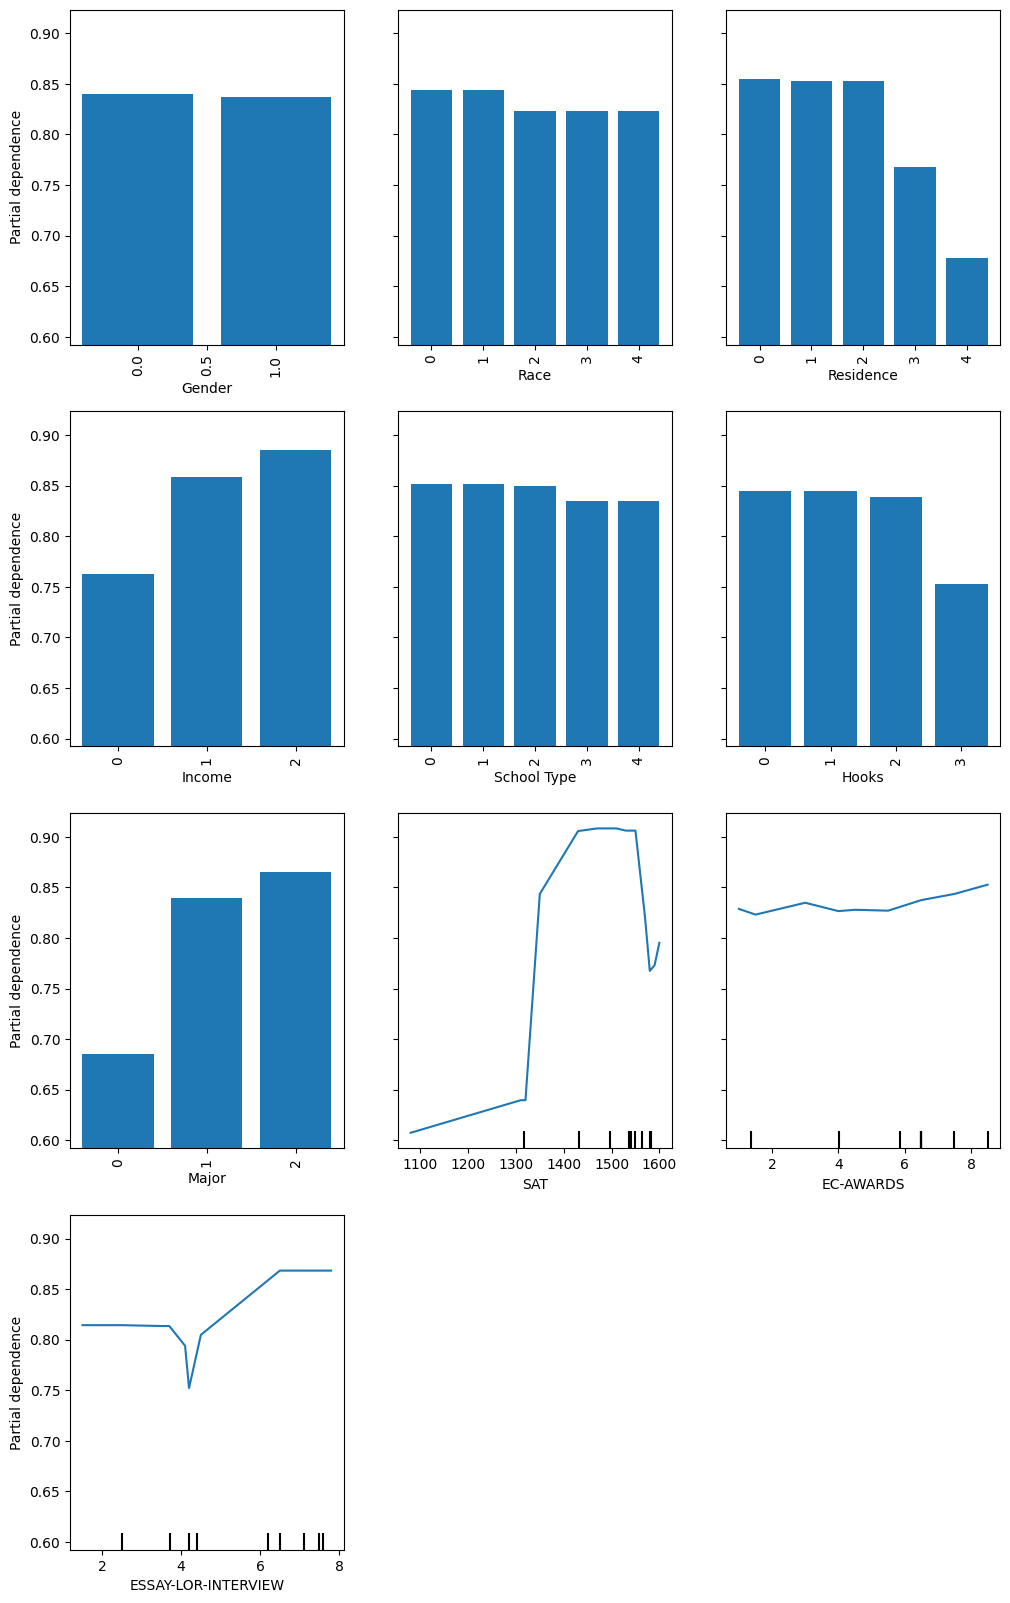

In [108]:
overall_df = pd.DataFrame(columns=['School', 'Applications', 'Acceptances', 'Waitlists', 'Rejections', 
                                   'AcceptedSATAvg', 'WaitlistedSATAvg', 'RejectedSATAvg', 
                                   'AcceptedECAvg', 'WaitlistedECAvg', 'RejectedECAvg', 
                                   'AcceptedEssayAvg', 'WaitlistedEssayAvg', 'RejectedEssayAvg',
                                   
                                   #correlations
                                    'COR-SAT-EC', 'COR-SAT-ESSAY', 'COR-SAT-Decision', 'COR-EC-Decision', 'COR-EC-ESSAY', 'COR-ESSAY-Decision',

                                    #catagorical correlations
                                    'pval-Gender', 'pval-Race', 'pval-Residence', 'pval-Income', 'pval-School Type', 'pval-Hooks', 'pval-Major',

                                    'RF_Accuracy', 
                                    
                                    'IMP-SAT', 'IMP-ESSAY-LOR-INTERVIEW', 'IMP-Residence', 'IMP-EC-AWARDS', 'IMP-Major', 'IMP-Gender', 'IMP-Hooks', 'IMP-Income', 'IMP-School Type', 'IMP-Race',
                                   ])

                                   

for college in colleges:
    college = college.removeprefix('*')
    
    accepted = df[df['Acceptances'].str.contains(college, regex=False)]
    accepted.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
    accepted['Decision'] = 0

    rejected = df[df['Rejections'].str.contains(college, regex=False)]
    rejected.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
    rejected['Decision'] = 2
    
    waitlisted = df[df['Waitlists'].str.contains(college, regex=False)]
    waitlisted.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
    waitlisted['Decision'] = 1

    college_df = pd.concat([accepted, rejected, waitlisted])

    
    #create folder if it doesnt exist
    import os
    if not os.path.exists(f'res/{college}'):
        os.makedirs(f'res/{college}')


    #basic analysis
    overall_df = pd.concat([overall_df, pd.DataFrame([basicAnalysis(college_df, college)], columns=overall_df.columns)], ignore_index=True)

    #correlations between features
    overall_df = getNumericalCorrelations(college_df, college, overall_df)
    overall_df = catagoricalCorrelations(college_df, college, overall_df)
    overall_df = optimalFeatures(college_df, college, overall_df)

    
    # save the dataset
    college_df.to_csv(f'res/{college}/dataset.csv', index=False)


In [109]:
overall_df.to_csv('overall.csv', index=False)
overall_df


,School,Applications,Acceptances,Waitlists,Rejections,AcceptedSATAvg,WaitlistedSATAvg,RejectedSATAvg,AcceptedECAvg,WaitlistedECAvg,...,IMP-SAT,IMP-ESSAY-LOR-INTERVIEW,IMP-Residence,IMP-EC-AWARDS,IMP-Major,IMP-Gender,IMP-Hooks,IMP-Income,IMP-School Type,IMP-Race
0,UCLA,530,136,139,255,1497.794118,1516.978417,1489.058824,6.253676,6.253957,...,0.184428,0.164759,0.112679,0.128588,0.126308,0.051942,0.053595,0.063031,0.057466,0.057205
1,HARVARD,506,67,77,362,1520.298507,1538.181818,1517.872928,7.037313,6.597403,...,0.156618,0.162473,0.165934,0.117601,0.109258,0.049676,0.066577,0.053528,0.048775,0.069561
2,YALE,489,87,34,368,1514.482759,1535.882353,1514.646739,6.833333,6.823529,...,0.157832,0.146364,0.144676,0.115452,0.109051,0.048208,0.093996,0.053825,0.069276,0.061319
3,STANFORD,534,69,22,443,1526.521739,1500.454545,1520.067720,6.681159,7.045455,...,0.175901,0.158538,0.134399,0.108587,0.105626,0.059694,0.076906,0.062923,0.052198,0.065227
4,NORTHWESTERN,417,89,56,272,1513.033708,1538.928571,1510.919118,6.426966,6.187500,...,0.163777,0.152382,0.132219,0.113477,0.130681,0.041149,0.074745,0.064254,0.069544,0.057772
5,COLUMBIA,519,112,93,314,1515.625000,1525.053763,1503.089172,6.683036,6.675269,...,0.163152,0.155314,0.158004,0.11522,0.105144,0.05479,0.068766,0.054045,0.064076,0.061488
6,CORNELL,585,153,105,327,1509.803922,1533.904762,1502.385321,6.227451,6.616190,...,0.17514,0.154385,0.15457,0.117937,0.112872,0.052937,0.062876,0.057385,0.057045,0.054853
7,BERKELEY,473,143,60,270,1496.853147,1511.833333,1502.111111,6.410490,6.308333,...,0.184121,0.167774,0.129357,0.122337,0.102628,0.054428,0.056886,0.067764,0.05767,0.057035
8,DUKE,396,100,49,247,1524.800000,1532.040816,1508.785425,6.870000,6.622449,...,0.172503,0.153993,0.14885,0.11919,0.10949,0.043267,0.077218,0.057373,0.054575,0.063541
9,PRINCETON,424,77,42,305,1522.207792,1528.571429,1519.475410,7.038961,7.000000,...,0.155994,0.169592,0.139961,0.122075,0.102801,0.047419,0.08858,0.057641,0.053122,0.062816
